In [1]:
%load_ext autoreload

In [33]:
%autoreload 2
%aimport sog1_helpers
import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from scipy.stats import pearsonr
from scipy import stats

# Ignore all warnings
warnings.filterwarnings('ignore')

In [48]:
js_sort3 = pd.read_csv("../data/Sog1_library2_activities_with_reads.csv")
js_sort3 = js_sort3[["Activity_S3_1", "AAseq"]].drop_duplicates()
js_sort3 = js_sort3.dropna()
js_sort3

,Activity_S3_1,AAseq
0,614.613867,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN
1,541.936177,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE
2,390.255889,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK
3,430.848450,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK
4,470.823534,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL
...,...,...
10011,5854.336897,EMLDDKEEQEKDRDNENQGEEDWTPFDSGSQFILNSQQLV
10012,5581.445157,EDPEWFDEGAQFILNEQQLVEALSLCDDLLGEQDREENEN
10013,5830.962190,DEAIPTVNQDDGICATHPKNAPGVKSDGTVSHAAHKAIKA
10014,5470.085295,DALSLCDDLLGSQDRDDNTNSGSLKDKQPCIADYAHLGPD


In [49]:
js_sort2 = pd.read_csv("../data/Sog1_all_activities_and_tiles_sort2.csv")
js_sort2 = js_sort2[["AAseq", "Activity_GFP8"]].drop_duplicates().dropna()
js_sort2

,AAseq,Activity_GFP8
0,MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP,351.546341
1,NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD,341.380814
2,SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR,428.862906
3,WKSNPSRHCPKCQHVIDNSDVVDDWPGLPRGVKFDPSDPE,417.236866
4,KCQHVIDNSDVVDDWPGLPRGVKFDPSDPEIIWHLLAKSG,759.332718
...,...,...
1708,PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,2379.148243
1709,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,427.740464
1710,GPKTPEISSMLVNNNEASFVEETNAAKKLKPNSDESDDLM,371.839745
1711,VVSSAPSSSCLDFLWEENNPDTLLIDTQWLEDIIMGDANK,8118.586601


In [50]:
intersect = pd.merge(js_sort3, js_sort2).drop_duplicates().dropna()
intersect

,Activity_S3_1,AAseq,Activity_GFP8
0,614.613867,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,636.156202
1,541.936177,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,602.696194
2,390.255889,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,381.502348
3,430.848450,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,347.155741
4,470.823534,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,437.694050
...,...,...,...
1104,5621.562443,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,8055.707854
1105,4168.130767,HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS,4444.689683
1106,5308.586517,EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN,7960.852191
1107,2264.103416,EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN,2769.615372


In [51]:
x = overlap["Activity_S3_1"] 
y = overlap["Activity_GFP8"] 

In [52]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def return_gfp8(s3_1):
  return slope * s3_1 + intercept

def return_s3_1(gfp8):
    return (1 / slope) * (gfp8 - intercept)

mymodel = list(map(myfunc, x))

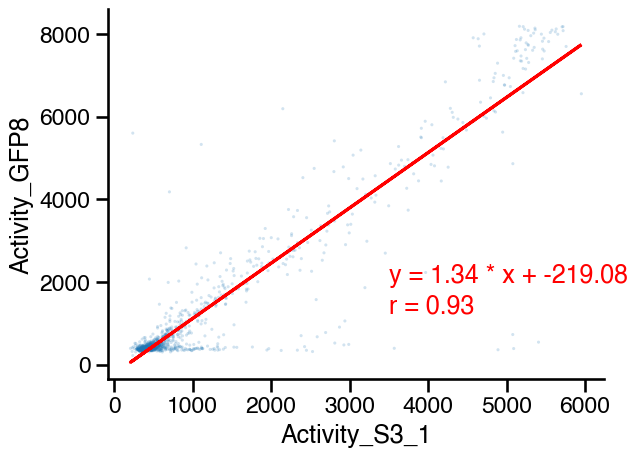

In [67]:
sns.set_context('talk')
sns.scatterplot(data = overlap, x = "Activity_S3_1", y = "Activity_GFP8", alpha = 0.2, edgecolor = 'none', s = 5)
plt.plot(x, mymodel, color = "red")
plt.text(3500, 2000, s = "y = " + str(np.round(slope, 2)) + " * x + " + str(np.round(intercept, 2)), color = "red")
plt.text(3500, 1250, s = "r = " + str(np.round(r, 2)), color = "red")
#plt.text(3500, 500, s = "p = " + str(np.round(p, 2)))

sns.despine()

In [69]:
pd.merge(js_sort3, js_sort2, how = "outer")

,Activity_S3_1,AAseq,Activity_GFP8
0,249.594110,AAAAAAAAAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,NaN
1,1241.417254,AAAAAAAACQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,NaN
2,1583.031366,AAAAAAAAGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL,NaN
3,2502.426945,AAAAAAAAGSQFILNSQQLVEALSLCDDLLGSQDREENTN,NaN
4,1440.849668,AAAAAAAALLGSQDREENTNSGSLKDKQPCIADYAHLGPE,NaN
...,...,...,...
10011,485.699268,YSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCK,350.917999
10012,1232.805769,YSTGTRKRRKILDDDLGDVRWHKTGRTKPVILDGVQRGCK,NaN
10013,725.779842,YTMDEEELGRCKNAKEYYALYKLYKKSGAGPKNGEQYGAP,NaN
10014,1079.435995,YVVSKLFFQQQFKPGDKNAQELTTSDDLESIAAEADLTDF,NaN


In [73]:
js_sort2[~js_sort2["AAseq"].isin(js_sort3["AAseq"])]

,AAseq,Activity_GFP8
1565,QKIVAKPSNIKLKDPPKFRLDQLKFGDQKSFLAWGTGKTK,403.206742
1645,EDPTWFSLGQVNQADEFIALQALSLCDDLLGAQDREENTN,3894.484062


# Interpolation is unnecessary because nearly everything in sort 2 is has JS S3_1 score